## Problem setup

In Minkowski spacetime and in cartesian coordinates $(t,x^{i})$, the local conservation laws describing the behaviour of a relativistic fluid in one spatial dimension can be expressed as follows:

$$
(1)\:\:\frac{\partial}{\partial t}\begin{pmatrix}
D\\
S\\
\tau\\
\end{pmatrix}+\frac{\partial}{\partial x}\begin{pmatrix}
Du\\
Su+p\\
S-Du\\
\end{pmatrix}=0,
$$

where $U=(D,S,\tau)$ is the state-vector of the conservative variables, defined as the

$$
D=\rho W,\:\:\:\:\text{the relativistic density of mass,}
$$

$$
S=\rho hW^{2}u,\:\:\:\:\text{the relativistic density of momenta, and}
$$

$$
\tau=\rho hW^{2}-p-D,\:\:\:\:\text{the relativistic density of energy,}
$$

where $W$ is the Lorentz factor. These variables are thus expressed in terms of the primitive set of variables, $w=(\rho,u,e)$, being the density, the 3-velocity (only in $x$ since we have just one spatial dimension) and the total density of internal energy, respectively. Moreover, a 4th equation closes the system, that is the equation of state which here will be considered as an ideal gas:

$$
p=(\gamma-1)\rho e,\:\:\:\:\text{with $\gamma$ the heat capacity ratio.}
$$

Finally, the flux can be written in terms of a mixture of both set of variables:

$$
F=(Du, Su+p,S-Du),
$$

and the enthalpy is:

$$
h=1+e+\frac{p}{\rho}=1+\gamma e.
$$

The local speed of sound, $c_{s}$, can be computed from:

$$
h\:c_{s}=\left[\frac{\partial p}{\partial\rho}\right]_{e}+\left(\frac{p}{\rho}\right)^{2}\left[\frac{\partial p}{\partial e}\right]_{\rho}\rightarrow c_{s}=\frac{(\gamma-1)e\left[1+(\gamma-1)^{2}\rho e\right]}{1+\gamma e}.
$$

Finally, the eigenvalues of the Jacobian matrix are those that follows, the first for the material waves and the other for the acoustic ones:

$$
\lambda_{0}=u,
$$

$$
\lambda_{\pm}=\frac{1}{1-u^{2}c_{s}^{2}}\left[u(1-c_{s}^{2})\pm c_{s}(1-u^{2})\right].
$$

With this, we are going to consider the following problem of initial conditions with a discontinuity:

$$
\text{Initial conditions ($t=0$)}=  \left\{
\begin{array}{ll}
      \rho_{0}:\:\:\rho=1.0 & \forall x \\
      u_{0}:\:\:u=0.9 & \text{if $x\leq 0.5$ and $u=0$ else}\\
      p_{0}:\:\:p=1.0 & \text{if $x\leq 0.5$ and $p=10.0$ else} \\
      e_{0}:\:\:e=\frac{1}{\gamma-1} & \text{if $x\leq 0.5$ and $e=\frac{10}{\gamma-1}$ else} \\
\end{array} 
\right.
$$

## Numerical scheme

Moreover, the discretization will be:

$$
x\in[0,1],\:\:\:t\in[0,0.2].
$$

Therefore, numerically this problem will be solved using a numerical scheme, which allows us to compute the $t+1$-th term from the $t$-th term in time, for all the spatial points of the discretization.

MUSCL based numerical schemes extend the idea of using a linear piecewise approximation to each cell by using slope limited left and right extrapolated states. This results in the following high resolution, TVD discretisation scheme in one spatial dimension, 

$$
\frac{dU_{j}}{dt}+\frac{1}{\Delta x}\left[F\left(U_{j+1/2}^{*}\right)-F\left(U_{j-1/2}^{*}\right)\right],
$$

or written in a semi-discrete form:

$$
U_{j}^{n+1}=U_{j}^{n}-\frac{\Delta t}{\Delta x}\left[F\left(U_{j+1/2}^{*}\right)-F\left(U_{j-1/2}^{*}\right)\right]
$$

These fluxes at the centre of the cell can be computed as follows:

$$
F_{j+1/2}^{*}=\frac{1}{2}\left[F\left(U_{j+1/2}^{+}\right)+F\left(U_{j+1/2}^{-}\right)\right]-\frac{1}{2}a_{j+1/2}\left(U_{j+1/2}^{-}-U_{j+1/2}^{+}\right),
$$

where the states at the left and right of the centre are:

$$
U_{j+1/2}^{+}=U_{j+1}^{n}-\frac{\Delta x}{2}(U_{x})_{j+1}^{n},
$$

$$
U_{j+1/2}^{-}=U_{j}^{n}+\frac{\Delta x}{2}(U_{x})_{j}^{n},
$$

and these velocities are:

$$
(U_{x})_{j}^{n}=\text{minmood}\left(\frac{U_{j}^{n}-U_{j-1}^{n}}{\Delta x},\frac{U_{j+1}^{n}-U_{j}^{n}}{\Delta x}\right).
$$

Finally, the local speed of propagation at the intercell will be calculated as:

$$
a_{j+1/2}=\text{max}\left\{\text{max}\left[|\lambda_{i}(A)|(U_{j+1/2}^{-})\right],\text{max}\left[|\lambda_{i}(A)|(U_{j+1/2}^{+})\right]\right\}
$$

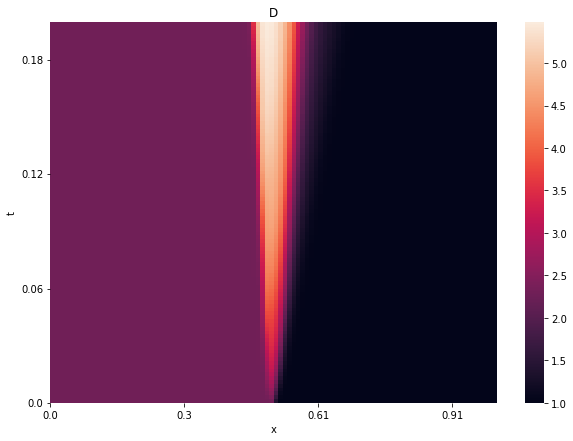

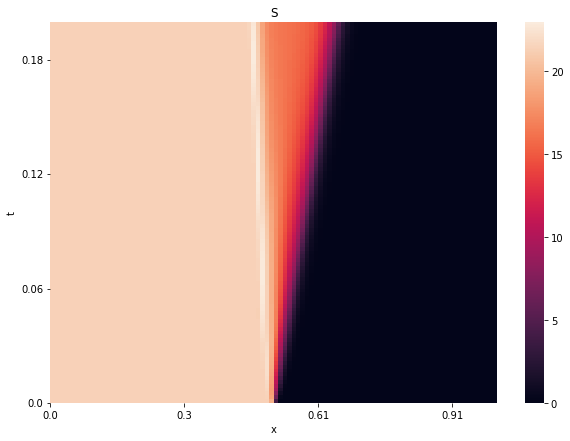

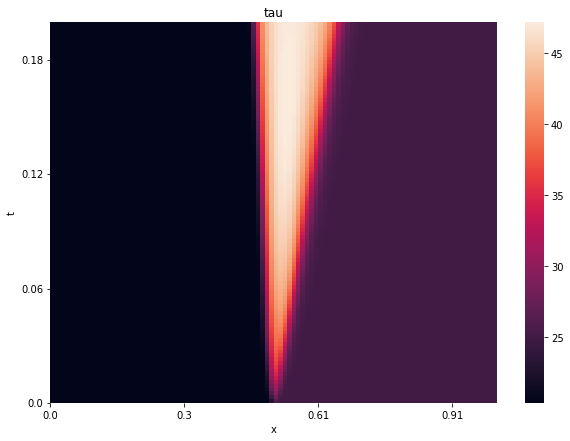

In [7]:
# Plot 2D heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Set up meshgrid
tspace = np.linspace(t_i, t_f, nt)
xspace = np.linspace(x_i, x_f, nx)
T, X = np.meshgrid(tspace, xspace)
Xgrid = np.vstack([T.flatten(),X.flatten()]).T

# Plot 2D heatmap
plt.figure(figsize = (10, 7))
ax = sns.heatmap(D_evolved)
ax.set_xticks(range(0, xspace.shape[0], 30))
ax.set_xticklabels([np.round(xspace[i], 2) for i in list(range(0, xspace.shape[0], 30))])
ax.set_yticks(range(0, tspace.shape[0], 30))
ax.set_yticklabels([np.round(tspace[i], 2) for i in list(range(0, tspace.shape[0], 30))])
plt.xlabel("x")
plt.ylabel("t")
plt.title("D")
ax.invert_yaxis()
plt.savefig("Images/D_Heatmap.png")
plt.show()

# Plot 2D heatmap
plt.figure(figsize = (10, 7))
ax = sns.heatmap(S_evolved)
ax.set_xticks(range(0, xspace.shape[0], 30))
ax.set_xticklabels([np.round(xspace[i], 2) for i in list(range(0, xspace.shape[0], 30))])
ax.set_yticks(range(0, tspace.shape[0], 30))
ax.set_yticklabels([np.round(tspace[i], 2) for i in list(range(0, tspace.shape[0], 30))])
plt.xlabel("x")
plt.ylabel("t")
plt.title("S")
ax.invert_yaxis()
plt.savefig("Images/S_Heatmap.png")
plt.show()

# Plot 2D heatmap
plt.figure(figsize = (10, 7))
ax = sns.heatmap(tau_evolved)
ax.set_xticks(range(0, xspace.shape[0], 30))
ax.set_xticklabels([np.round(xspace[i], 2) for i in list(range(0, xspace.shape[0], 30))])
ax.set_yticks(range(0, tspace.shape[0], 30))
ax.set_yticklabels([np.round(tspace[i], 2) for i in list(range(0, tspace.shape[0], 30))])
plt.xlabel("x")
plt.ylabel("t")
plt.title("tau")
ax.invert_yaxis()
plt.savefig("Images/tau_Heatmap.png")
plt.show()

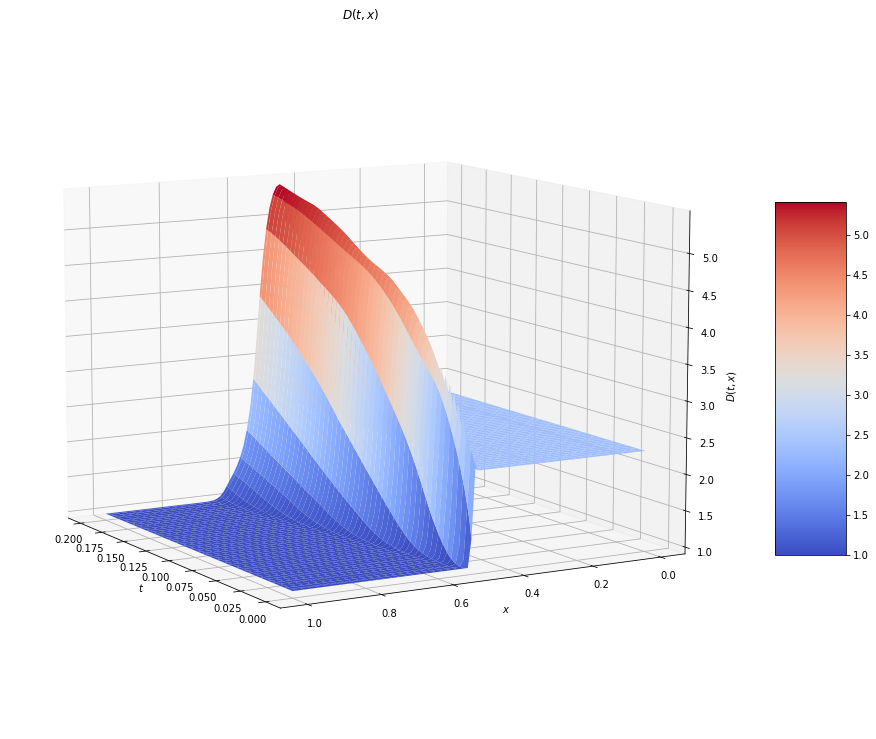

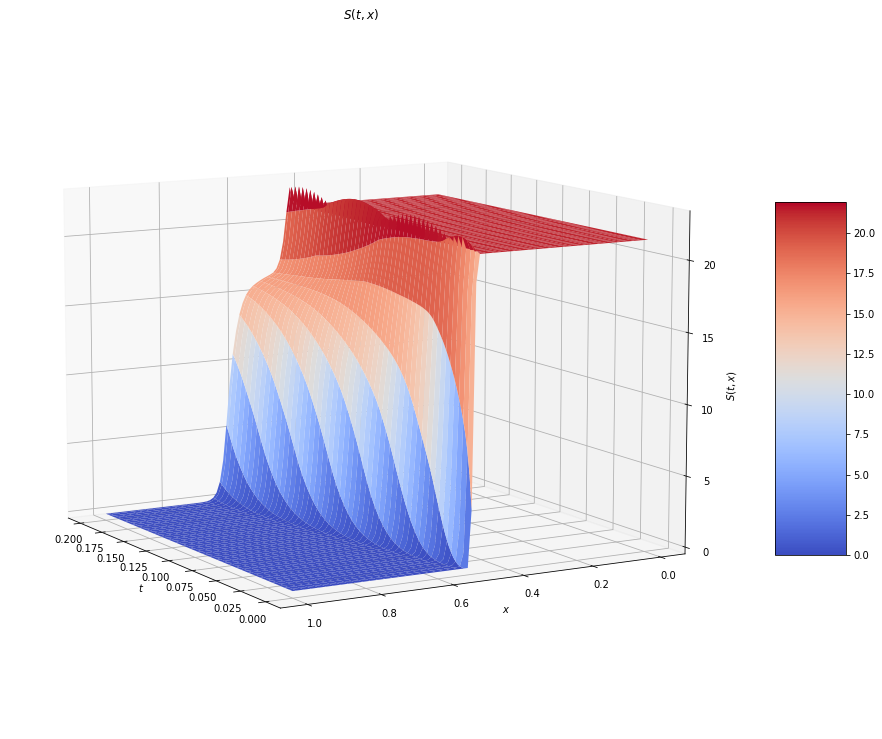

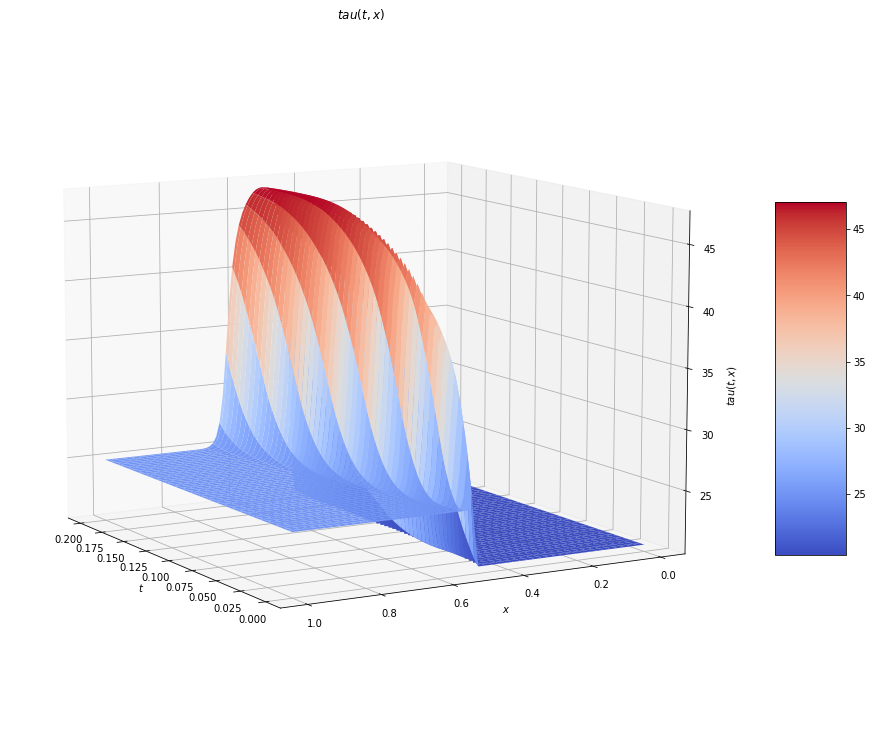

In [28]:
# Plot 3D surface
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_size_inches(22, 13)
surf = ax.plot_surface(T, X, D_evolved.T, cmap = cm.coolwarm, linewidth = 0, antialiased = True)
ax.view_init(elev = 10, azim = 150)
ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.set_zlabel('$D(t,x)$')
ax.set_title('$D(t,x)$')
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.savefig("Images/D_3D.png")
plt.show()

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_size_inches(22, 13)
surf = ax.plot_surface(T, X, S_evolved.T, cmap = cm.coolwarm, linewidth = 0, antialiased = True)
ax.view_init(elev = 10, azim = 150)
ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.set_zlabel('$S(t,x)$')
ax.set_title('$S(t,x)$')
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.savefig("Images/S_3D.png")
plt.show()

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_size_inches(22, 13)
surf = ax.plot_surface(T, X, tau_evolved.T, cmap = cm.coolwarm, linewidth = 0, antialiased = True)
ax.view_init(elev = 10, azim = 150)
ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.set_zlabel('$tau(t,x)$')
ax.set_title('$tau(t,x)$')
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.savefig("Images/tau_3D.png")
plt.show()

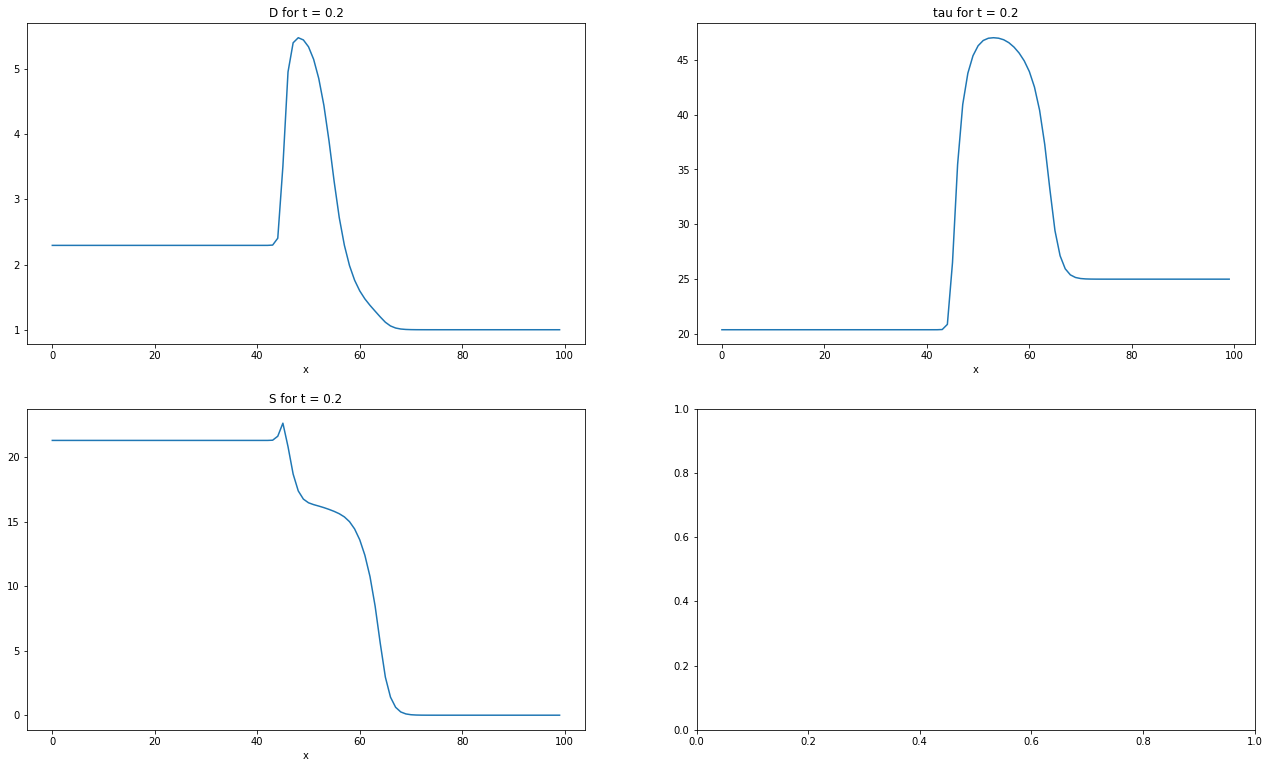

In [29]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(22, 13)

ax[0, 0].plot(D_evolved[D_evolved.shape[0]-1,:])
ax[0, 0].set_xlabel("x")
ax[0, 0].set_title("D for t = 0.2")
ax[1, 0].plot(S_evolved[S_evolved.shape[0]-1,:])
ax[1, 0].set_xlabel("x")
ax[1, 0].set_title("S for t = 0.2")
ax[0, 1].plot(tau_evolved[tau_evolved.shape[0]-1,:])
ax[0, 1].set_xlabel("x")
ax[0, 1].set_title("tau for t = 0.2")
plt.savefig("Images/Plots_1D.png")
plt.show()